# Task 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
store = pd.read_csv("D:\Data Science\Course 11\DS3_C1_S2_Store_Item_Sales_Data_Challenge.csv")
store.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
store.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [4]:
store = store.set_index('date')
store = store[["sales"]]
print(store.head(5))

            sales
date             
2013-01-01     13
2013-01-02     11
2013-01-03     14
2013-01-04     13
2013-01-05     10


In [5]:
store.tail()

,sales
date,
2017-12-27,63
2017-12-28,59
2017-12-29,74
2017-12-30,62
2017-12-31,82


# Task 2

In [6]:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing


In [7]:
decomposition = seasonal_decompose(store, period = 12)
decomposition

In [8]:
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

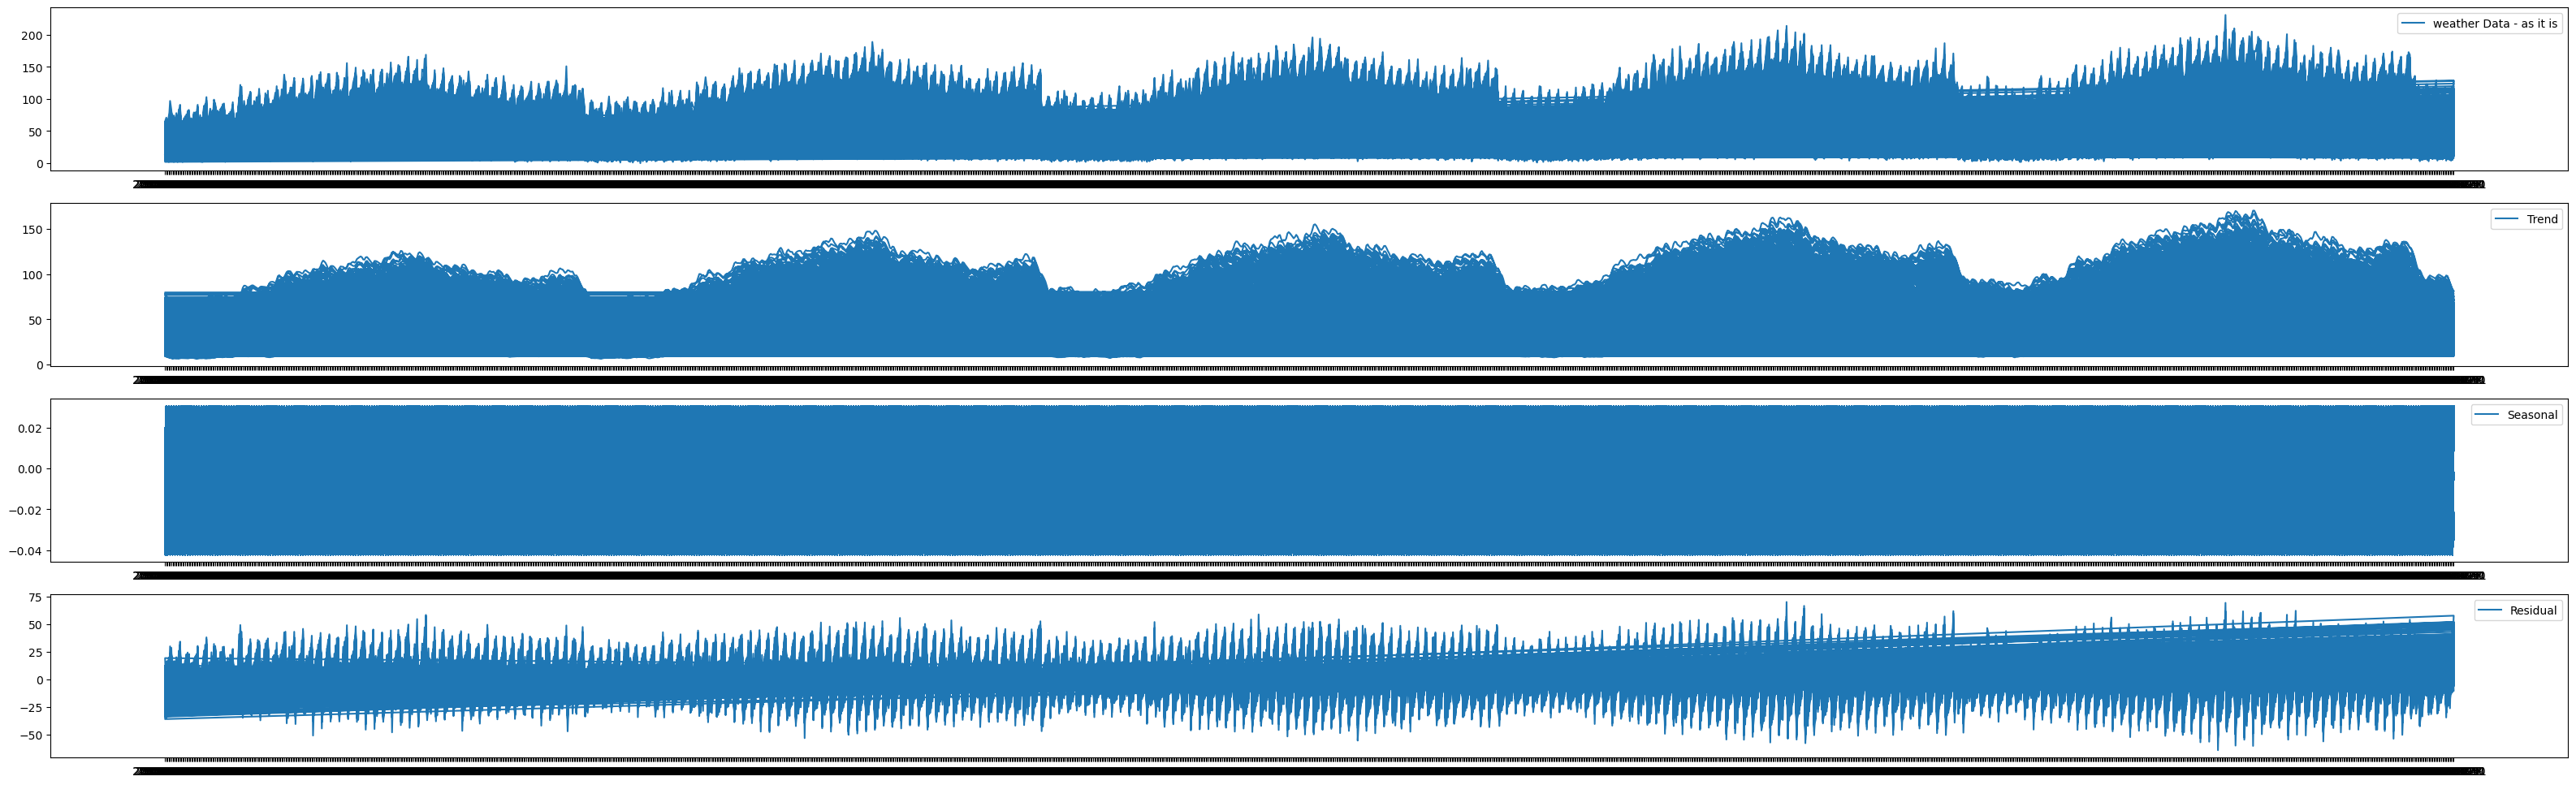

In [9]:
# plotting all the 4 graph
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,1,figsize=(40,12))

plt.subplot(411)
plt.plot(store,label='Sales Data - as it is')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best') 

## Resample 

In [10]:
store.index = pd.to_datetime(store.index)

In [11]:
df_month = store.resample('M').sum()

In [12]:
decomposition = seasonal_decompose(df_month, period = 12)
decomposition

In [13]:
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

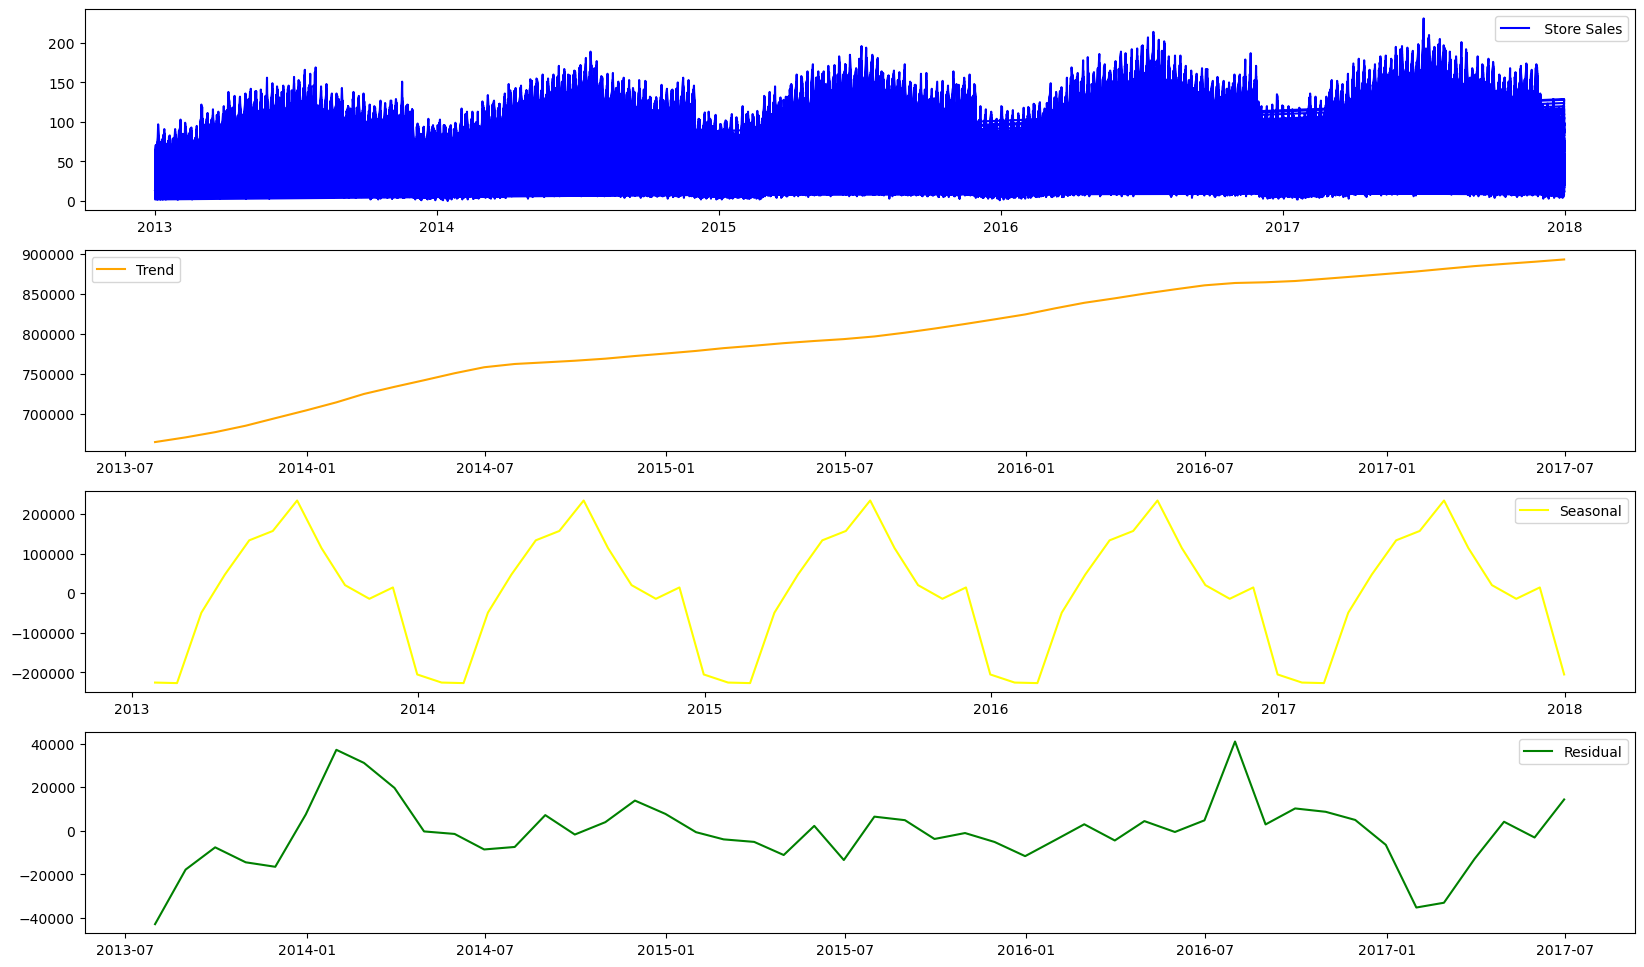

In [14]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(4,1,figsize=(20,12))


plt.subplot(411)
plt.plot(store,label=' Store Sales', color = 'blue')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend',color = 'orange')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal',color = 'yellow')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual',color = 'green' )
plt.legend(loc='best') 

 Interpretation : As we can see that there is trend , seasonality , reusidual present in the data. 

# Task 3

In [15]:
from statsmodels.tsa.stattools import adfuller

def checkStationarity(data):
    pvalue = adfuller(data["sales"])[1]
    print(pvalue)
    if pvalue < 0.05 :
        msg = "pvalue = {}. Data is stationary. Proceed to model building".format(pvalue)
    else :
        msg = "pvalue = {}. Data is not stationary. Make the data stationary before model building"
    return msg

In [16]:
print(checkStationarity(df_month))

7.026495391574649e-06
pvalue = 7.026495391574649e-06. Data is stationary. Proceed to model building


# Task 4

## Simple Exp Smoothing

In [23]:
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing


In [24]:
data = df_month["sales"]
data

date
2013-01-31     454904
2013-02-28     459417
2013-03-31     617382
2013-04-30     682274
2013-05-31     763242
2013-06-30     795597
2013-07-31     855922
2013-08-31     766761
2013-09-30     689907
2013-10-31     656587
2013-11-30     692643
2013-12-31     506607
2014-01-31     525987
2014-02-28     529117
2014-03-31     704301
2014-04-30     788914
2014-05-31     882877
2014-06-30     906842
2014-07-31     989010
2014-08-31     885596
2014-09-30     785124
2014-10-31     758883
2014-11-30     800783
2014-12-31     578048
2015-01-31     552513
2015-02-28     551317
2015-03-31     730951
2015-04-30     824467
2015-05-31     926902
2015-06-30     937184
2015-07-31    1037350
2015-08-31     920401
2015-09-30     823332
2015-10-31     797253
2015-11-30     827645
2015-12-31     607572
2016-01-31     602439
2016-02-29     614957
2016-03-31     790881
2016-04-30     901950
2016-05-31     988730
2016-06-30    1022664
2016-07-31    1138718
2016-08-31     981494
2016-09-30     896831
2016-

In [27]:
def simplesmoothing(data, alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level = alpha)  # traing model
    pdct = model.fittedvalues ## forcasting values
    
    df = pd.DataFrame({'actual' : data, 'forecast' : pdct})
    return (model,df)

In [28]:
alphas = [0,0.2, 0.6,0.8]

d_simple_exp = {}
models = []

In [29]:
for a in alphas:
    m,df = simplesmoothing(data, a)
    d_simple_exp[a] = df.forecast
    models.append(m)

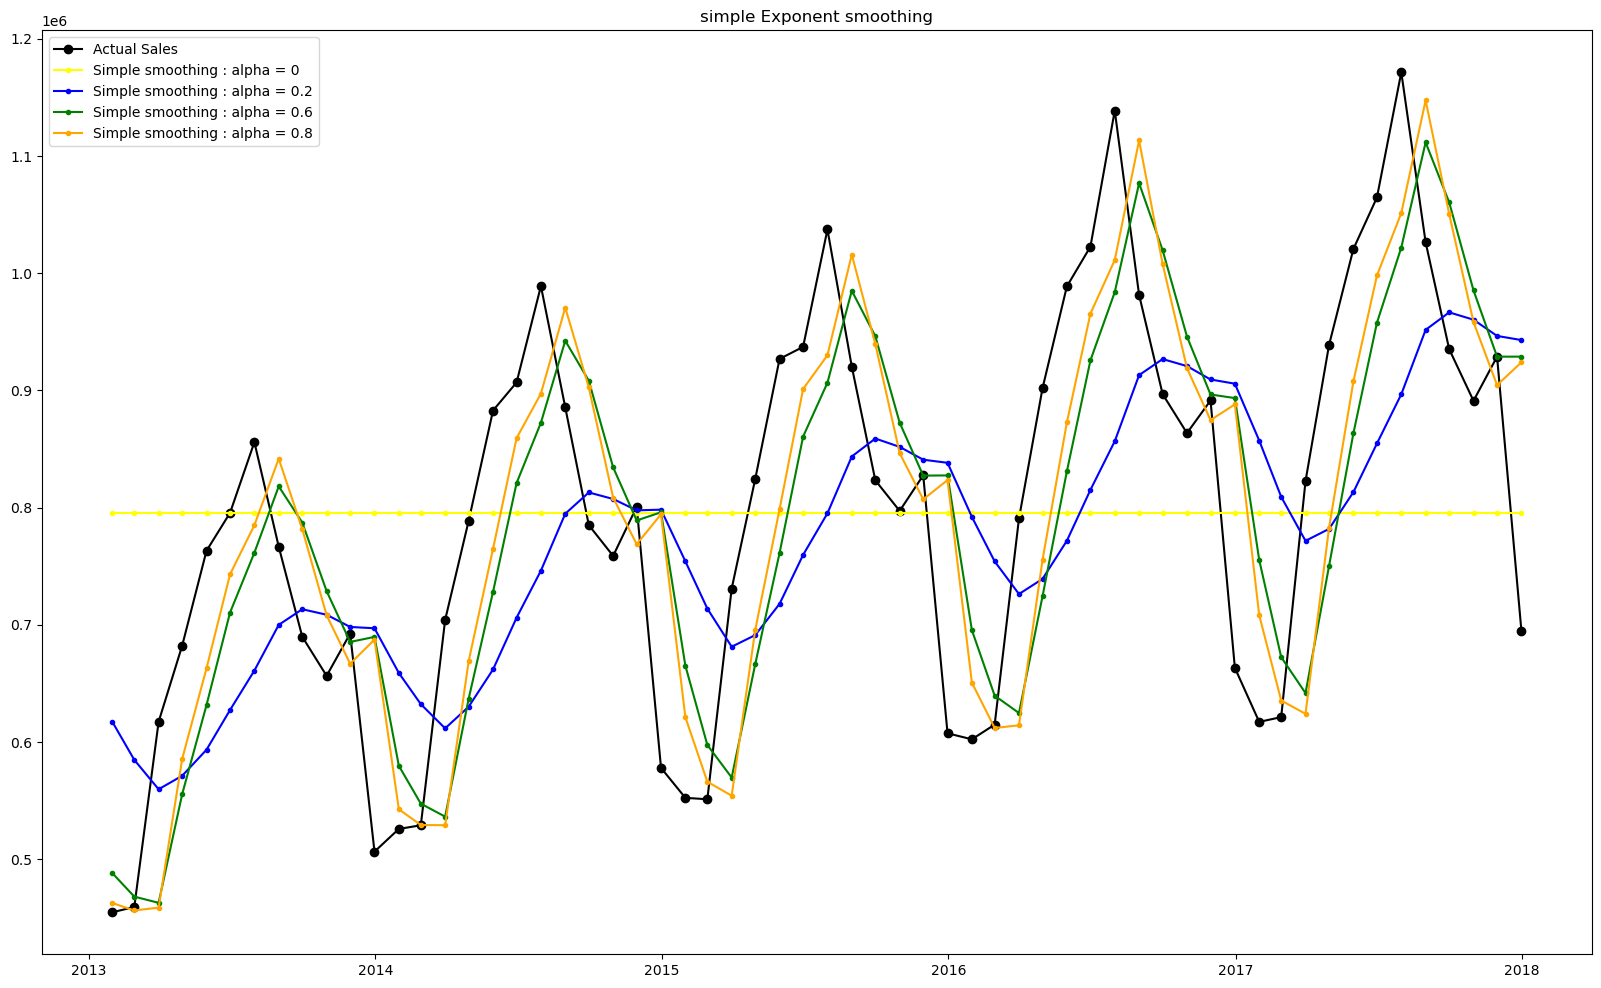

In [44]:
colors = ['yellow', 'blue', 'green', 'orange']

fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker = 'o', color = 'black', label = "Actual Sales ")


for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]], marker = '.', color = colors[i], label = 'Simple smoothing : alpha = ' +str(alphas[i]))
  
plt.title('simple Exponent smoothing')
plt.legend()
plt.show()

### DOUBLE EXPONENT SMOOTHING --> TREND & LEVEL

In [31]:
alpha = 0.8 ; beta = 0.45 # Random value

In [32]:
model2 = ExponentialSmoothing(data, trend = 'additive').fit(smoothing_level = alpha, smoothing_trend = beta)

In [33]:
f_dexp = model2.fittedvalues
print(f_dexp)

date
2013-01-31    4.405729e+05
2013-02-28    5.275819e+05
2013-03-31    5.240547e+05
2013-04-30    6.833191e+05
2013-05-31    7.667093e+05
2013-06-30    8.469135e+05
2013-07-31    8.703644e+05
2013-08-31    9.181153e+05
2013-09-30    8.018492e+05
2013-10-31    6.768135e+05
2013-11-30    6.178689e+05
2013-12-31    6.618434e+05
2014-01-31    4.659244e+05
2014-02-28    4.638671e+05
2014-03-31    4.894496e+05
2014-04-30    7.120598e+05
2014-05-31    8.519398e+05
2014-06-30    9.662236e+05
2014-07-31    9.868750e+05
2014-08-31    1.057508e+06
2014-09-30    9.270153e+05
2014-10-31    7.694582e+05
2014-11-30    7.131469e+05
2014-12-31    7.669537e+05
2015-01-31    5.315210e+05
2015-02-28    4.715636e+05
2015-03-31    4.873265e+05
2015-04-30    7.218911e+05
2015-05-31    8.805442e+05
2015-06-30    1.010912e+06
2015-07-31    1.018669e+06
2015-08-31    1.107078e+06
2015-09-30    9.639971e+05
2015-10-31    8.070863e+05
2015-11-30    7.513009e+05
2015-12-31    7.919413e+05
2016-01-31    5.576380e

Text(0.5, 1.0, 'DOUBLE EXPONENT SMOOTHING')

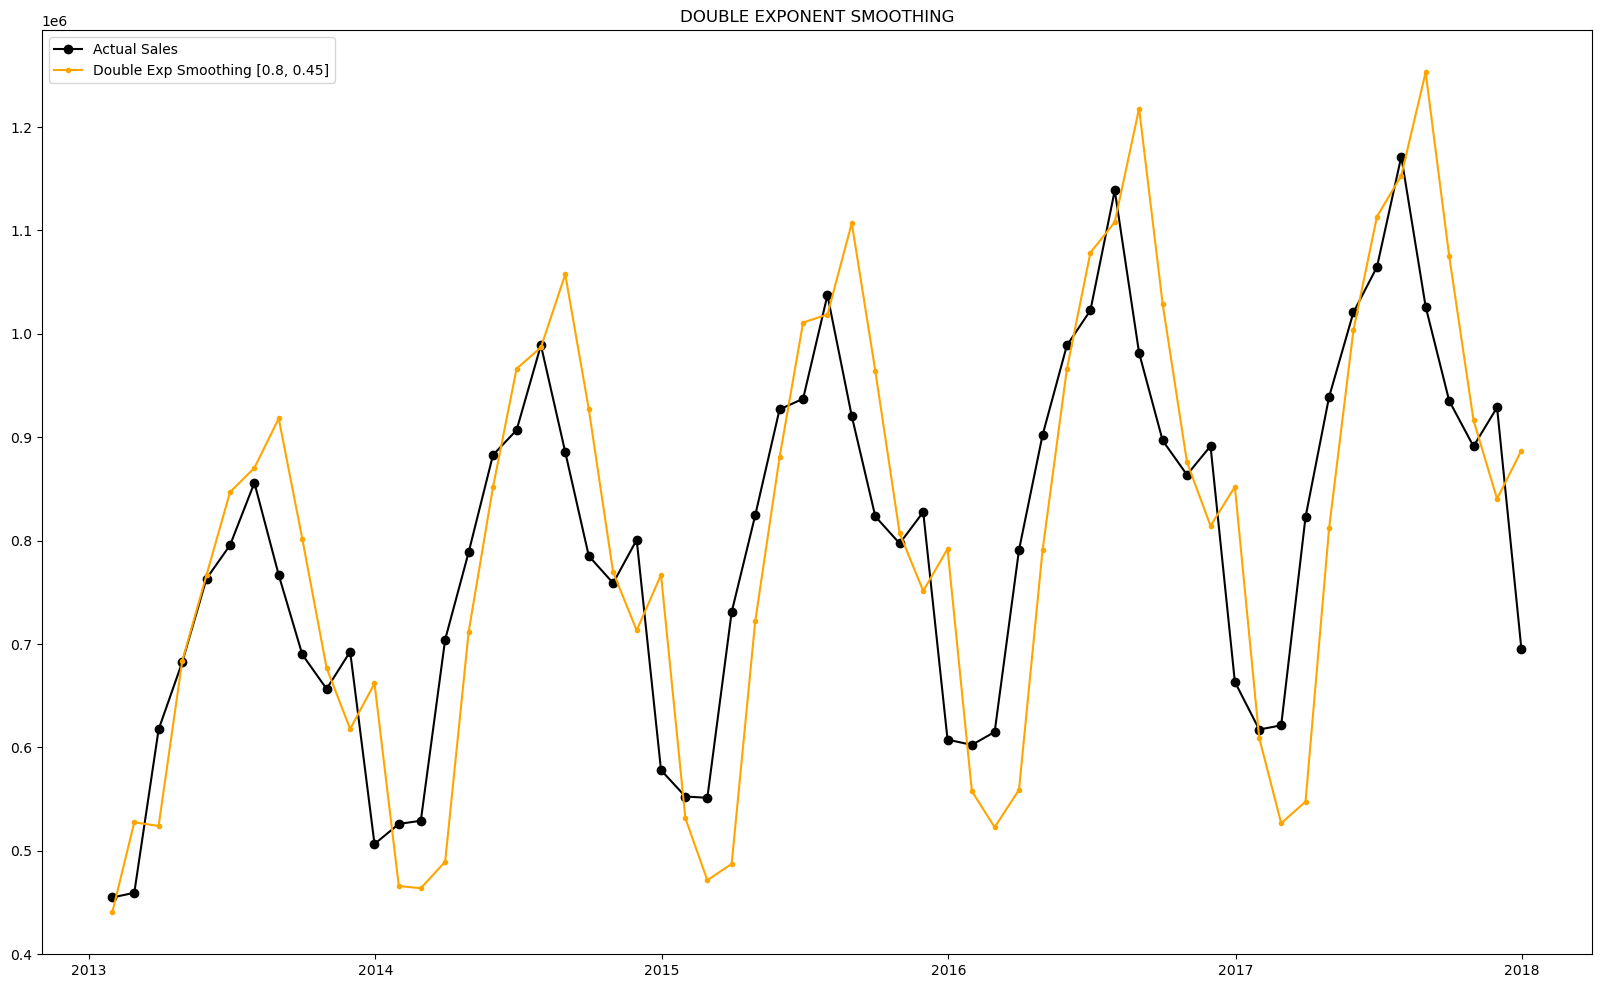

In [42]:
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker = 'o', color = 'black', label = 'Actual Sales')
plt.plot(f_dexp, marker = '.', color = 'orange', label = 'Double Exp Smoothing [0.8, 0.45]')
plt.legend()
plt.title("DOUBLE EXPONENT SMOOTHING")

## Triple Exponent Smoothing (trend and seasonality)

In [37]:
alpha = 0.8; beta = 0.5; gamma = 0.15

In [38]:
model3 = ExponentialSmoothing(data, trend= 'add', seasonal='add', seasonal_periods=12).fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma)

In [39]:
predicted_model3 = model3.fittedvalues

Text(0.5, 1.0, 'Triple Exponent Smoothing')

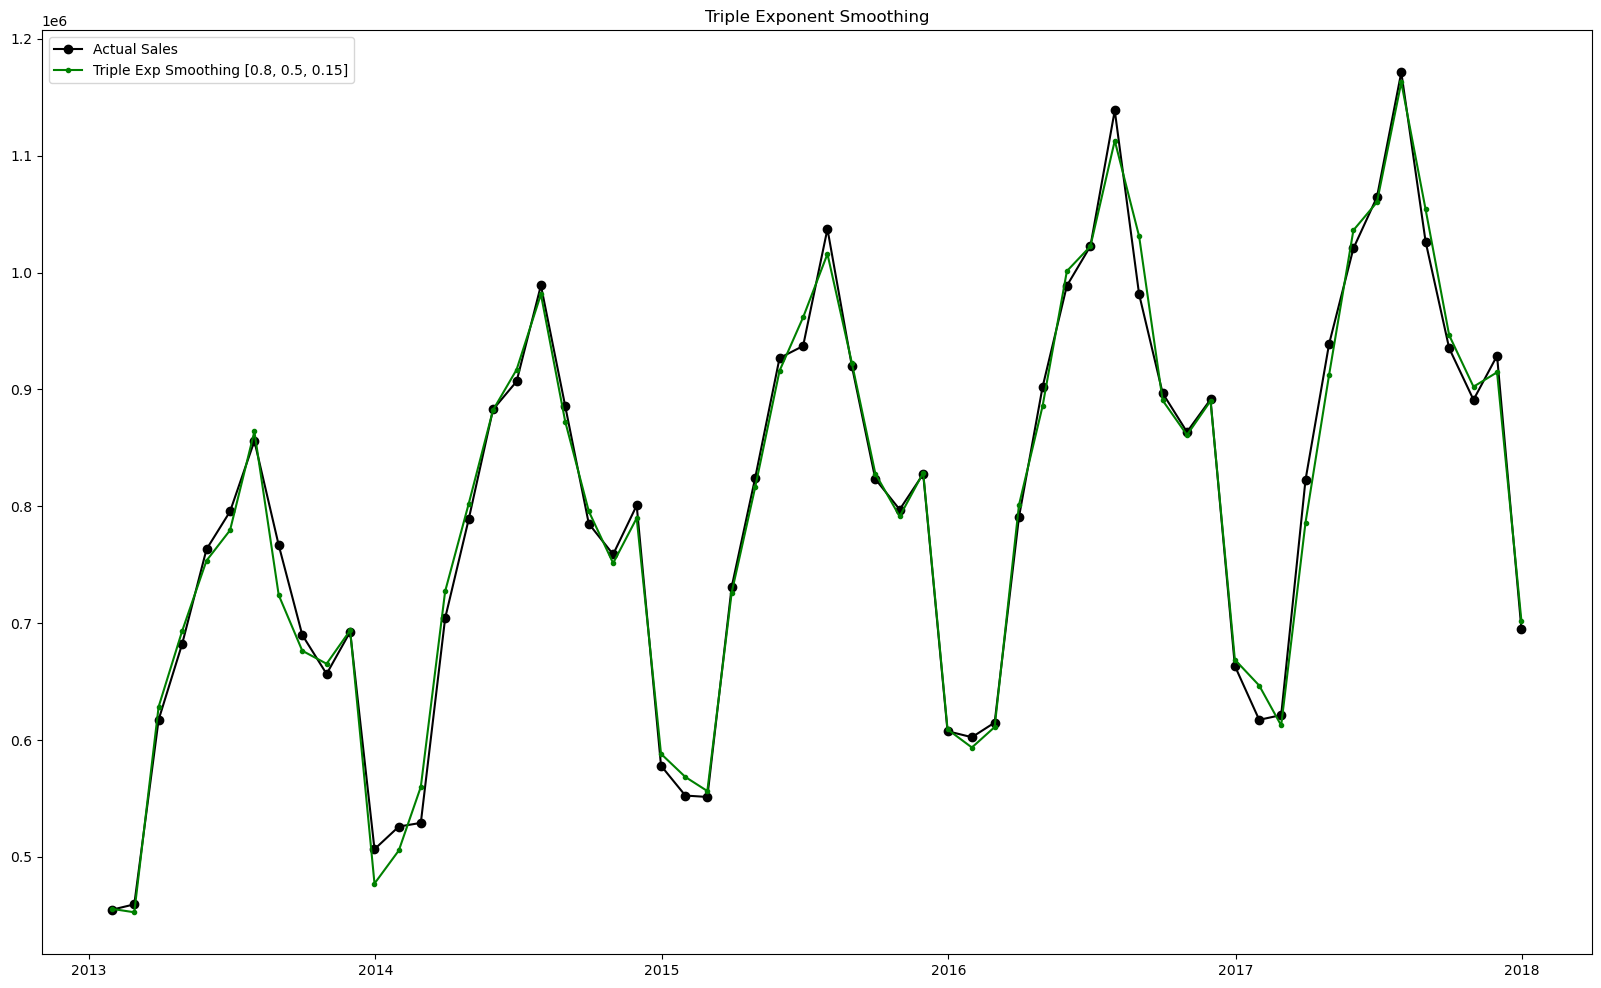

In [43]:
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker = 'o', color = 'black', label = 'Actual Sales ')
plt.plot(predicted_model3, marker = '.', color = 'green', label = 'Triple Exp Smoothing [0.8, 0.5, 0.15]')
plt.legend()
plt.title("Triple Exponent Smoothing")

# Interpretation :

From above graphs we can see that triple Triple Exponent Smoothing is best as Actual Sales and predicted sales are overlap it means very less error in predicted with alpha value = 0.8